# 1. Data Preparation and Visualization
### 1.1 Read data

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
data = sio.loadmat("./ex7/ex7data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [2]:
X = data["X"]
X.shape

(50, 2)

### 1.2 Visualize data

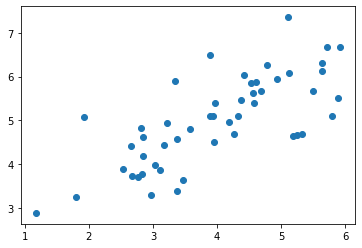

In [3]:
def plot_data(X):
    fig,ax =plt.subplots()
    ax.scatter(X[:,0],X[:,1])
    
plot_data(X)

# 2. Model Implementation
### 2.1 Principle Conponent Analysis - using SVD(singluar Value Decomposition)

In [4]:
def pca(X):
    # normalize data
    X = (X-X.mean())/X.std()
    # calculate coveriance matrix
    cov =(X.T @ X)/X.shape[0]
    # SVD(Singluar Value Decomposition)
    U,S,V = np.linalg.svd(cov)
    return U,S,V    

U,S,V= pca(X)
print(U,S,V, sep = "\n\n")

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]

[1.43584536 0.56415464]

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]


U is a matrix with priciple component vectors, where e1=[-0.8,-0.6], e2=[-0.6,0.8], which are orthogonal basis.

S measures the performance of projection vectors - the higher the better. Here we can see u1 has a better projection result and it is the 1st principle component 

### 2.2 Calculate the projection and select the top k vectors here

In [5]:
def project_data(X,U,k):
    U_reduced = U[:,:k] # choose k features we want to keep
    return np.dot(X,U_reduced)

In [6]:
Z = project_data(X,U,1)
Z.shape

(50, 1)

### 2.3 Restore the input data from compressed data

In [7]:
def recover_data(Z,U,k):
    U_reduced =U[:,:k]
    return np.dot(Z,U_reduced.T)

In [8]:
X_recovered = recover_data(Z,U,1)
X_recovered[:5,:]

array([[3.76152442, 2.89550838],
       [5.67283275, 4.36677606],
       [3.80014373, 2.92523637],
       [3.53223661, 2.71900952],
       [3.80569251, 2.92950765]])

# 3. Performance Evaluation

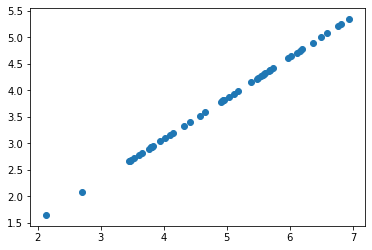

In [9]:
plot_data(X_recovered)

As we can see, the restored data basically is back, although it has loss (distribution is a little bit different) 

# 4. Practice 

In [10]:
faces = sio.loadmat("./ex7/ex7faces.mat")
faces.keys()
X= faces["X"]
X.shape

(5000, 1024)

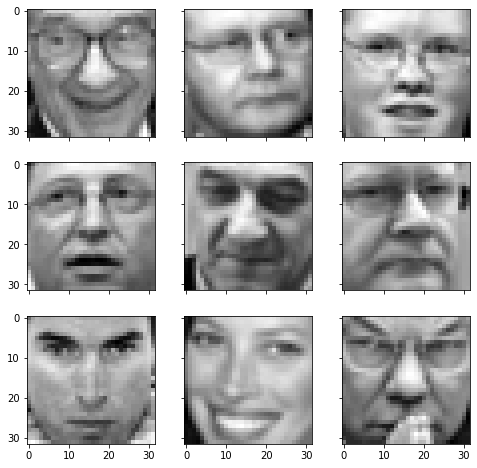

In [11]:
def plot_n_image(X,n):
    #n must be a squared number here
    pic_size  = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))
    first_n_image = X[:n,:]
    fig,axes = plt.subplots(nrows = grid_size,ncols=grid_size,
                          sharex= True, sharey=True,
                          figsize = (8,8))
    for r in range(grid_size):
        for c in range(grid_size):
            axes[r,c].imshow(first_n_image[grid_size * r + c].reshape((pic_size,pic_size)).T, cmap="gray" )
          
plot_n_image(X,9)                        

Now, let's pick the first face to apply our PCA.

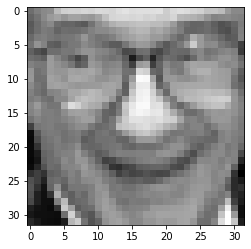

In [12]:
face = np.reshape(X[0,:],(32,32)).T
plt.imshow(face,cmap = "gray")

In [13]:
# use all 5000 faces to apply pca and reduce 1024 features to the top 100 features 
U,S,V = pca(X)
Z =project_data(X,U,100)
Z.shape

(5000, 100)

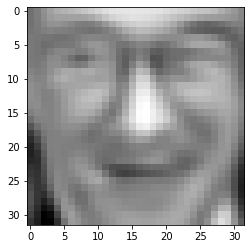

In [14]:
X_recover = recover_data(Z,U,100)
face = np.reshape(X_recover[0,:],(32,32)).T
plt.imshow(face,cmap = "gray")

Although the picture is much smaller, the majority of the original details remain